In [2]:
import sys
sys.path.append('../..')
import cv2
import os
import json
#%matplotlib ipympl
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from gslib.gsdevice import Camera
from gslib.gs3drecon import Reconstruction3D
from gslib.gsviz import Visualize3D, plot_gradients
from gslib.train.utils import depths2points

MMPP = 0.0634

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
model_path = "/home/rpl/joehuang/gelsightfusion_ws/src/gelsightfusion/data/ball_indenters/model/nnmini.pth"
data_dir = "/home/rpl/joehuang/gelsightfusion_ws/src/gelsightfusion/data/ball_indenters"
with open(os.path.join(data_dir, "train_test_split.json")) as f:
    train_test_split = json.load(f)
    train_reldirs = train_test_split["train"]
    test_reldirs = train_test_split["test"]
background_image = cv2.imread(os.path.join(data_dir, "background.png"))
imgh = background_image.shape[0]
imgw = background_image.shape[1]

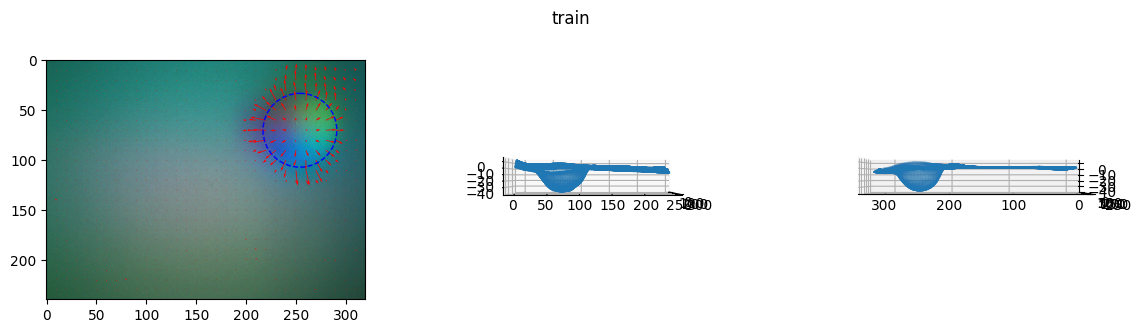

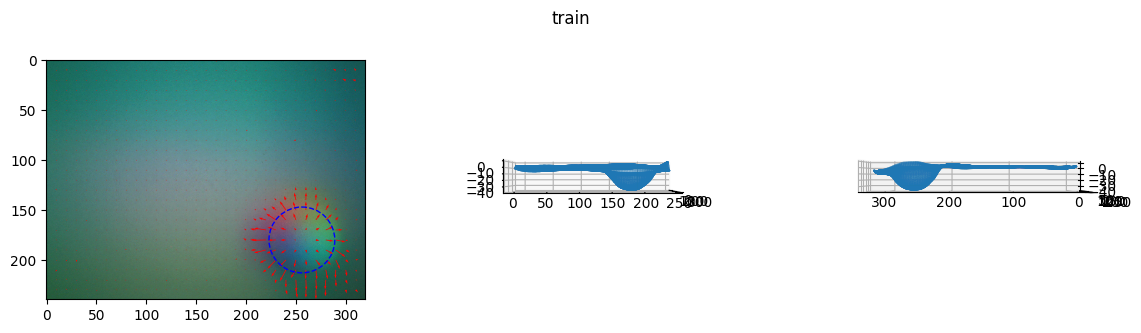

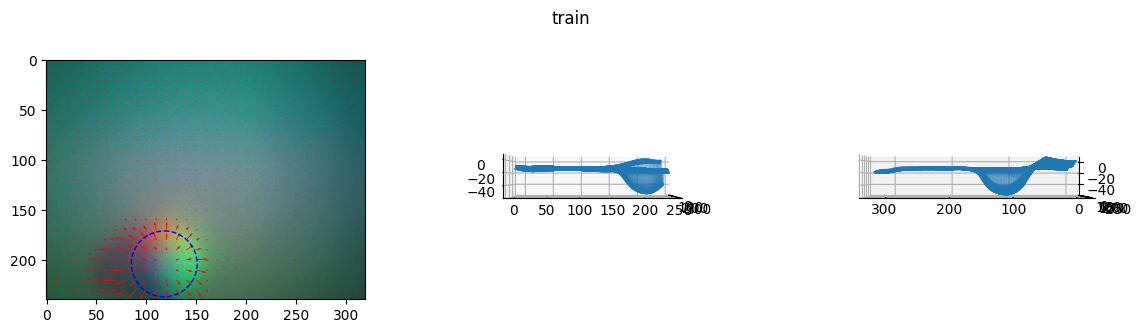

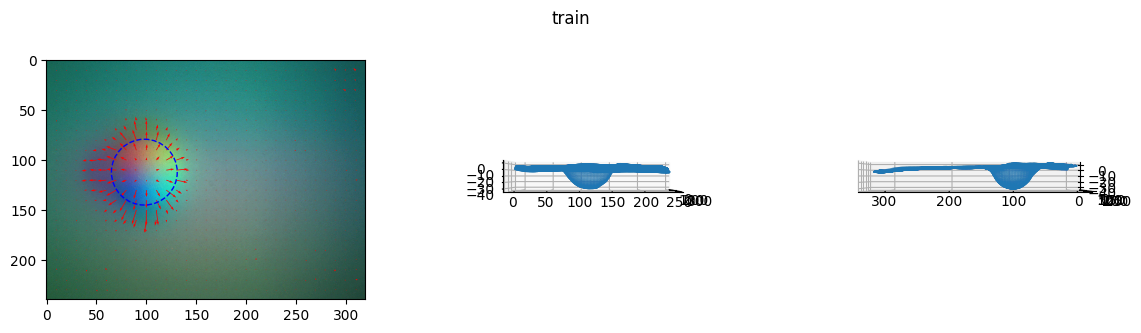

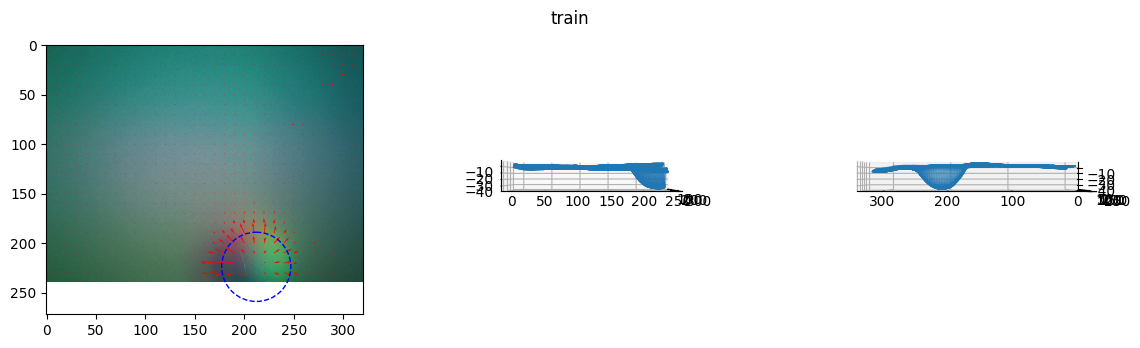

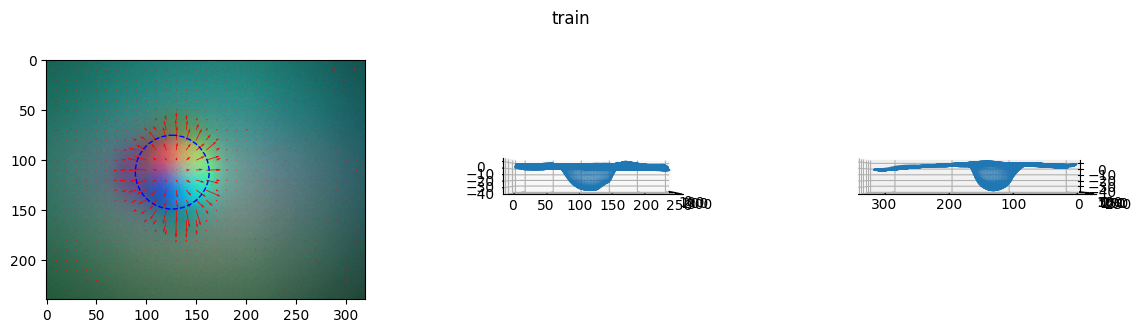

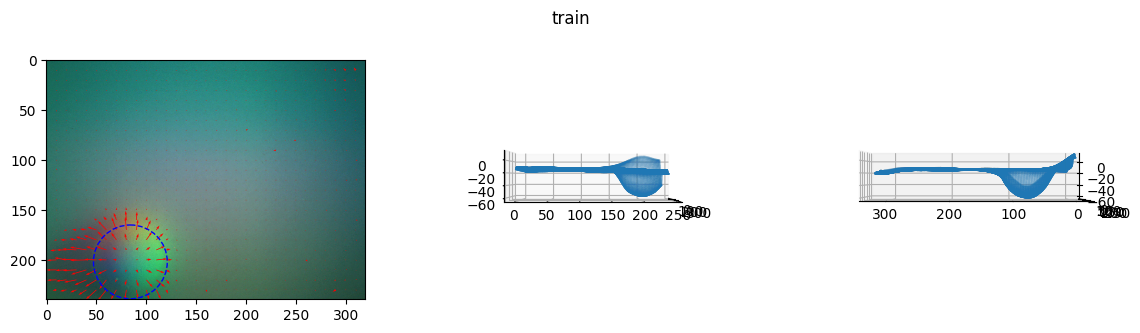

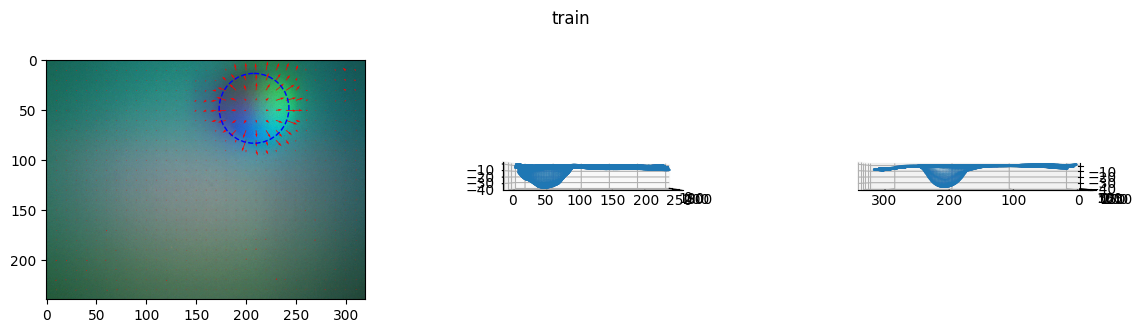

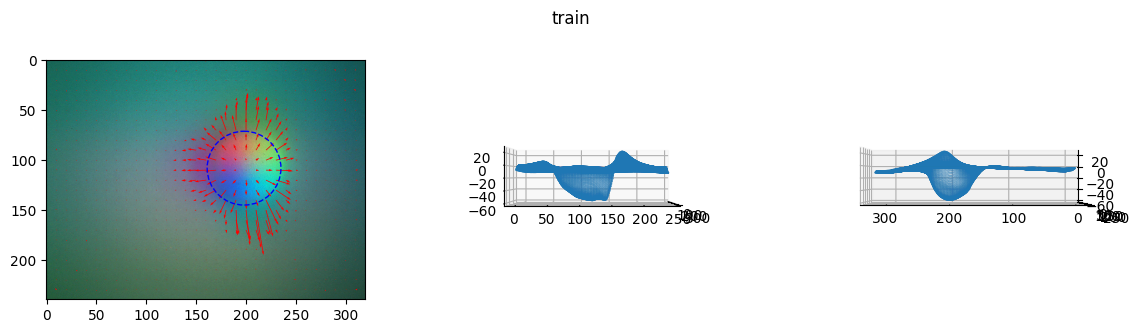

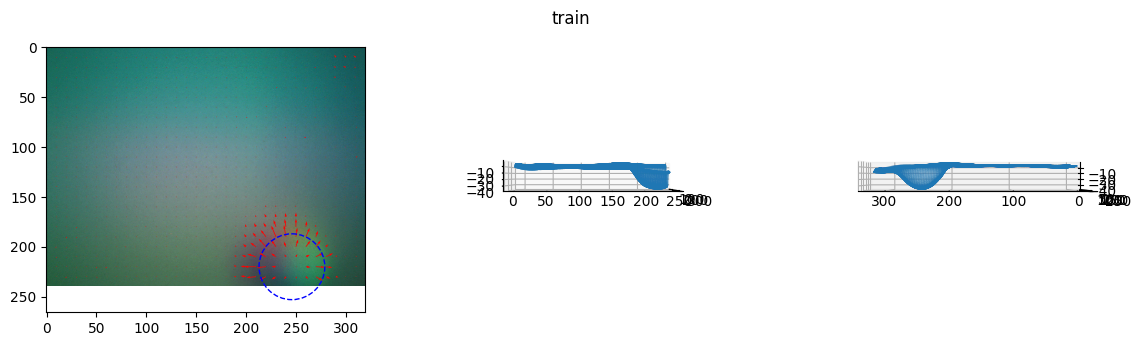

In [8]:
import matplotlib.animation as animation
from IPython.display import HTML

# Reconstruct 3D object
nn = Reconstruction3D(imgh, imgw)
nn.load_nn(model_path)

# Get depthmap
for reldir in train_reldirs[:10]:
    image = cv2.imread(os.path.join(data_dir, reldir, "frame.png"))
    label = np.load(os.path.join(data_dir, reldir, "label.npz"))
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    dm, gx, gy = nn.get_depthmap(image, mask_markers=False)
    points = depths2points(dm, imgh, imgw)
    # Plot
    fig = plt.figure(figsize=(14, 3.5))
    ax = fig.add_subplot(131)
    plot_gradients(fig, ax, rgb_image, gx, gy, n_skip=10)
    circle = plt.Circle(
        label["center"], radius=label["radius"], color="b", fill=False, linestyle="--"
    )
    ax.add_patch(circle)
    ax = fig.add_subplot(132, projection="3d")
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=0.01)
    ax.set_aspect("equal", adjustable="box")
    ax.view_init(0, 0)
    ax = fig.add_subplot(133, projection="3d")
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=0.01)
    ax.set_aspect("equal", adjustable="box")
    ax.view_init(0, 90)
    fig.suptitle('train')
    plt.show()

# Get depthmap
for reldir in test_reldirs[:10]:
    image = cv2.imread(os.path.join(data_dir, reldir, "frame.png"))
    label = np.load(os.path.join(data_dir, reldir, "label.npz"))
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    dm, gx, gy = nn.get_depthmap(image, mask_markers=False)
    points = depths2points(dm, imgh, imgw)
    # Plot
    fig = plt.figure(figsize=(14, 3.5))
    ax = fig.add_subplot(131)
    plot_gradients(fig, ax, rgb_image, gx, gy, n_skip=10)
    circle = plt.Circle(
        label["center"], radius=label["radius"], color="b", fill=False, linestyle="--"
    )
    ax.add_patch(circle)
    ax = fig.add_subplot(132, projection="3d")
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=0.01)
    ax.set_aspect("equal", adjustable="box")
    ax.view_init(0, 0)
    ax = fig.add_subplot(133, projection="3d")
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=0.01)
    ax.set_aspect("equal", adjustable="box")
    ax.view_init(0, 90)
    fig.suptitle('test')
    plt.show()